# Vignettes

Model predictions at some interesting locus-- LIN28A on chr1 is a good test candidate.

**Inputs**:
1. Outputs from Py_Vignette script-- normalized insertsions and prediction tsvs at some locus.
2. Cluster config

In [437]:
library(ggplot2)
library(patchwork)
library(Gviz)
library(rtracklayer)
library(ggplotify)
library(ggseqlogo)
library(scales)
library(BSgenome.Hsapiens.UCSC.hg38)
library(reshape2)
hg38 = BSgenome.Hsapiens.UCSC.hg38

## Load Input Data

### Configs

In [19]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

# adding for now, though it should be inside
cluster_config[16,] = c(cluster=16, color="#000000", description="iPSC", new_cluster=15)

cluster_config = cluster_config[!is.na(cluster_config$cluster), ]
rownames(cluster_config) = as.factor(cluster_config$cluster)
cluster_config$new_cluster = as.integer(cluster_config$new_cluster)
cluster_config$cluster = as.integer(cluster_config$cluster)
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#A6D854,Pre-iPSC,14
2,2,#F0A118,Intermediate,12
3,3,#E85F6D,Fibroblast-like,3
4,4,#006658,Neural-like,8
5,5,#B03743,Fibroblast,1
6,6,#CF175A,Fibroblast-like,4
7,7,#78A824,Pre-iPSC,13
8,8,#F4D5CD,Intermediate,11
9,9,#D4B81C,Intermediate,9


## Preds/Insertions

In [20]:
model_preds = read.table("./vignette_intermediate/LIN28A.prom.chr1.26410794.pred.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(model_preds) = model_preds$cluster_idx
model_preds$cluster_idx = NULL
model_preds

,predicted_adjusted_cts,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,6.750444,0.02267834,0.03464907,0.01676376,0.002497720,0.001214690,0.001879311,0.007364995,0.01489823,0.01127412,⋯,0.002180667,0.006920065,0.01490587,0.01084412,0.004436443,0.002733401,0.004066103,0.006951047,0.004773673,0.005116140
4,7.570887,0.03798370,0.05172295,0.02105046,0.004838024,0.004183085,0.006501437,0.016659511,0.02622544,0.01826297,⋯,0.003756788,0.008049509,0.01771788,0.01498972,0.006865970,0.004442817,0.005964950,0.009737296,0.007889579,0.005084005
8,7.542090,0.04528415,0.05132561,0.02630551,0.007917306,0.004024521,0.006355913,0.021310983,0.03433223,0.02123673,⋯,0.003486701,0.013004203,0.02872436,0.02232788,0.009060528,0.004687558,0.005015624,0.008555525,0.006393032,0.005678104
2,7.772440,0.06045769,0.08967868,0.05127017,0.007188939,0.004235989,0.009180301,0.032026574,0.04961451,0.03028169,⋯,0.004097815,0.017784622,0.03457500,0.02358260,0.010436947,0.005760731,0.006027645,0.009445286,0.009518658,0.009482868
7,8.152068,0.10653155,0.15071025,0.07918202,0.017982993,0.011529703,0.016242811,0.048473388,0.08135064,0.05630830,⋯,0.004509605,0.015905634,0.02750709,0.02113762,0.012119296,0.005125768,0.006046000,0.012314562,0.009896226,0.008637893
1,8.253019,0.12130453,0.20834649,0.10687878,0.026214186,0.015126417,0.019355305,0.058055148,0.08994115,0.04572751,⋯,0.009781756,0.040205456,0.07505968,0.05465694,0.028514504,0.013727401,0.028873306,0.040733613,0.022564597,0.024411598
16,8.388212,0.14480864,0.22541021,0.11675139,0.020144178,0.010126713,0.020901173,0.073394400,0.13450874,0.09855522,⋯,0.010436579,0.031057535,0.06049755,0.04626800,0.022735748,0.011527324,0.019354628,0.030671770,0.022420134,0.018689219


In [21]:
insertions = read.table("./vignette_intermediate//LIN28A.prom.chr1.26410794.insertions.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(insertions) = insertions$cluster_idx
insertions$cluster_idx = NULL
insertions

,total_adjusted_cts,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,6.122493,0.01960784,0.01960784,0.00000000,0.0000000,0,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.000000,0.0000000,0.00000000
4,5.714799,0.00000000,0.00000000,0.00000000,0.0000000,0,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.000000,0.0000000,0.00000000
8,6.185710,0.00000000,0.07692308,0.00000000,0.0000000,0,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.000000,0.0000000,0.00000000
2,7.084505,0.07692308,0.07692308,0.03846154,0.0000000,0,0.00000000,0.0000000,0.07692308,0.0000000,⋯,0.07692308,0.00000000,0.03846154,0.00000000,0,0,0.00000000,0.000000,0.0000000,0.00000000
7,8.043980,0.33333333,0.00000000,0.00000000,0.0000000,0,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.000000,0.0000000,0.00000000
1,8.467864,0.07692308,0.38461538,0.00000000,0.0000000,0,0.00000000,0.2307692,0.00000000,0.0000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.000000,0.0000000,0.00000000
16,9.028748,0.31914894,0.23404255,0.02127660,0.0212766,0,0.04255319,0.1063830,0.12765957,0.0212766,⋯,0.00000000,0.04255319,0.06382979,0.04255319,0,0,0.04255319,0.106383,0.0212766,0.08510638


In [188]:
importance = read.table("./vignette_intermediate/LIN28A.prom.chr1.26410794.counts.explain.tsv", 
                         sep='\t',
                        header=T)
rownames(importance) = importance$cluster_idx
importance$cluster_idx = NULL
importance

,lower_lim,upper_lim,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,-0.07947541,0.09080806,-0.0002371508,2.603201e-03,0.0026489355,2.067081e-03,5.168216e-04,-0.0035927772,1.302763e-03,-4.030347e-04,⋯,0.0079643132,0.0078040805,3.621499e-03,-4.346153e-03,0.0013691488,3.182350e-03,0.0025447041,4.154397e-03,0.0021477681,-0.0008261562
4,-0.07636631,0.06809741,-0.0014814169,-9.947459e-05,0.0006388215,5.723000e-04,-1.696784e-03,-0.0017065470,2.559026e-04,-1.474386e-03,⋯,0.0041371000,0.0037638757,1.835584e-03,-3.198946e-03,0.0007051632,1.834675e-03,0.0020738950,2.254824e-03,0.0001947555,-0.0043821891
8,-0.04654324,0.07285068,-0.0010427123,9.412214e-04,0.0015974969,1.501771e-03,1.058099e-03,-0.0009100891,2.918842e-04,1.190300e-03,⋯,0.0028774124,0.0004563652,-3.860611e-05,-2.206918e-03,0.0007052654,1.190337e-03,0.0022220052,3.011992e-03,0.0005488076,-0.0015642294
2,-0.04817490,0.06561382,-0.0009976184,1.273184e-03,0.0020896395,1.359374e-03,-1.914174e-05,-0.0023206531,-7.290555e-05,-7.776925e-04,⋯,0.0023560489,0.0028779121,3.728739e-03,-2.034424e-04,0.0046803119,2.275291e-03,0.0028793932,1.852854e-04,0.0008767194,0.0038290723
7,-0.05308239,0.07287863,-0.0020879743,-1.280611e-03,0.0011072254,1.406738e-03,6.552969e-04,-0.0001492837,2.997376e-04,-4.641048e-06,⋯,0.0008654538,0.0002976270,1.427898e-03,9.693214e-06,0.0020623843,-4.192465e-05,0.0005417642,-1.849745e-05,-0.0016360137,0.0013803852
1,-0.03758578,0.05922177,-0.0006101079,-3.534186e-04,0.0011855234,5.922811e-05,-2.510873e-04,0.0004151790,5.587352e-05,-3.891251e-04,⋯,0.0015615122,0.0013875023,3.731858e-03,1.130604e-03,0.0027896418,1.354403e-03,0.0030446656,5.905031e-04,0.0015872404,0.0018031009
16,-0.05378968,0.06748849,-0.0002553500,2.705376e-04,0.0026285166,7.919629e-04,-1.044546e-03,0.0010650518,-3.815448e-04,-6.904887e-04,⋯,0.0061192135,0.0050834001,1.185971e-02,3.125298e-03,0.0100421562,9.533607e-03,0.0102276497,5.234863e-03,0.0049681022,0.0013713413


In [22]:
CLUSTERS = rownames(insertions)
CLUSTERS
all(CLUSTERS %in% rownames(model_preds))

[1] "5"  "4"  "8"  "2"  "7"  "1"  "16"

[1] TRUE

### Gene Model

In [140]:
gencode.basic.hg38 = import.gff(gzfile("../../../resources/GENCODE/gencode.v33.chr_patch_hapl_scaff.basic.annotation.gtf.gz"))
gencode.basic.hg38 = keepStandardChromosomes(gencode.basic.hg38, pruning.mode = "coarse")
gene_anno <- data.frame(gencode.basic.hg38)
gene_anno = gene_anno[!is.na(gene_anno$exon_number), ]
gene_anno = gene_anno[gene_anno$gene_type=="protein_coding", ]

# rename some columns to match requirements
gene_anno$chromosome <-  gene_anno$seqnames
gene_anno$gene <- gene_anno$gene_id
gene_anno$transcript <- gene_anno$transcript_name
gene_anno$symbol <- gene_anno$gene_name

gene_anno$feature = as.character(gene_anno$type)
gene_anno$exon = gene_anno$exon_id
gene_anno = gene_anno[,c("chromosome", "start", "end", "strand", "gene", "symbol", "transcript", "feature", "exon")]
head(gene_anno)

Warning message in readGFF(filepath, version = version, filter = filter):
"connection is not positioned at the start of the file, rewinding it"


,chromosome,start,end,strand,gene,symbol,transcript,feature,exon
,<fct>,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
57,chr1,65419,65433,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003812156.1
58,chr1,65520,65573,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003813641.1
59,chr1,65565,65573,+,ENSG00000186092.6,OR4F5,OR4F5-202,CDS,ENSE00003813641.1
60,chr1,65565,65567,+,ENSG00000186092.6,OR4F5,OR4F5-202,start_codon,ENSE00003813641.1
61,chr1,69037,71585,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003813949.1
62,chr1,69037,70005,+,ENSG00000186092.6,OR4F5,OR4F5-202,CDS,ENSE00003813949.1


## Functions

In [162]:
get_gene_track <- function(chr, gene_anno, show_axis=T, col='navyblue') {
    gene_track <- GeneRegionTrack(gene_anno, genome = "hg38", 
                                 chromosome = chr, 
                                 name = "", 
                                 collapseTranscripts="longest",
                                 transcriptAnnotation="symbol",
                                background.title = 'transparent',
                                  
                                fill=col,
                                stackHeight=0.5,
                                 
                                col=col,
                                col.line=col,
                                fontcolor.group=col,
                                lwd=2,
                                  fontsize.group=20
                                 )
    if (!show_axis) {
            displayPars(gene_track)$showTitle = F
        }
    
    gene_track
}

In [100]:
plot_mat <- function(obs_mat, pred_mat, title=F) {
    plots = list()
    
    i=1
    for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {
        plots[[i]] = ggplot(data.frame(x=seq(ncol(obs_mat)),
                                       y=unlist(obs_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    geom_area(aes(x=x,y=y), fill=cluster_config[x,"colour"]) +
                    ylim(0,1) + 
                    theme_void(base_size=18) +
                    annotate('text', x=1900, y=0.7, label="Obs", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i]] = plots[[i]] + 
                            ggtitle(paste(cluster_config[x, "new_cluster"],
                              cluster_config[x, "description"],
                             sep=" - ")) 
        
        plots[[i+1]] = ggplot(data.frame(x=seq(ncol(pred_mat)),
                                       y=unlist(pred_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    geom_area(aes(x=x,y=y), fill=cluster_config[x,"colour"]) +
                    ylim(0,1) + 
                    theme_void() +
                    annotate('text', x=1900, y=0.7, label="Pred", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i+1]] = plots[[i+1]] + 
                            ggtitle(" ") 

#         else {
#             # need this to keep alignment
#             plots[[i]] = plots[[i]] + ggtitle(" ")
#         }
        
        i = i + 2
    }
    
    plots
}


In [186]:
# many bigwigs, one peak
importance_to_matrix <- function(clusters, imp_scores, peak) {
    # get DNA sequence
    sequence = hg38[[as.vector(seqnames(peak))]][(start(peak)+1):(end(peak))]
    
    scores = list()
    
    for (i in clusters) {
        m = matrix(0, length(sequence), 4)
        colnames(m) = c("A", "C", "G", "T")
        m[cbind(seq(length(sequence)), as.vector(matrix(sequence)))] = unlist(imp_scores[i, 3:ncol(imp_scores)])
        
        scores[[i]] = t(m)
    }
    
    scores
}

In [187]:
plot_seq <- function(m, ymin, ymax, clip=F, cutrange=NULL) {
    mat = m
    
#     rownames(mat) = c("A", "C", "G", "T")
    
    # cap to upper and lower limits
    if (clip==T) {
        mat[mat>ymax] = ymax
        mat[mat<ymin] = ymin
    }
    
    
    if (length(cutrange) == 0) {
        p = ggseqlogo(mat, method='custom', seq_type='dna') 
    }
    
    else {
        p = ggseqlogo(mat[,cutrange], method='custom', seq_type='dna') 
    }
    
    p = p + theme_void() + coord_cartesian(ylim=c(ymin, ymax))
    
    p
}

## Plotting

In [192]:
CHR= "chr1"
START = 26409794
END = 26411794

REGION = GRanges(sprintf("%s:%d-%d", CHR, START, END))

top_plot = ggplot() + annotate("text", x=5, y=1, label=sprintf("LIN28A Promoter (%s:%d-%d)", CHR, START, END), size=8) +
#             annotate("text", x=7.5, y=1, label="Predicted", size=TXTSZ) +
            xlim(c(0,10)) + 
            theme_void()

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message:
"Removed 3 rows containing missing values (position_stack)."


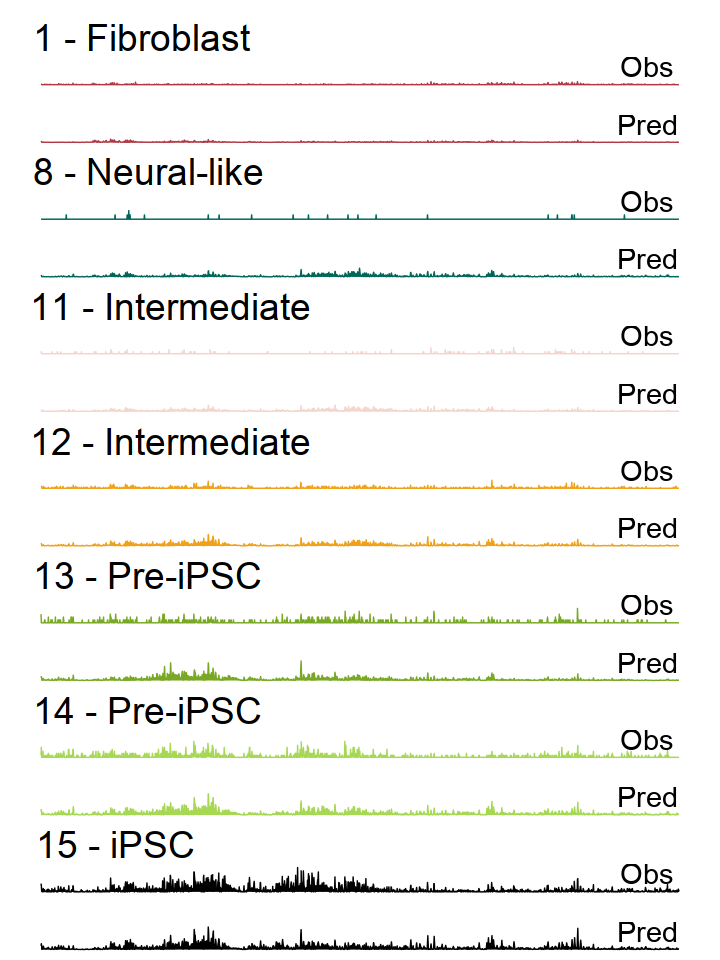

In [185]:
options(repr.plot.width = 10, repr.plot.height = 8)
 
signal_plot = wrap_plots(plot_mat(insertions[,2:2001], model_preds[,2:2001]), ncol=1)

signal_plot

### Counts Aggregated

In [181]:
cts_df = data.frame(x=rep(sort(cluster_config[CLUSTERS,"new_cluster"]),2),
           y=c(rep("Predicted Counts ",length(CLUSTERS)), rep("Observed Counts ",length(CLUSTERS))),
           vals = c(scale(model_preds[CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])],]$predicted_adjusted_cts),
                    scale(insertions[CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])],]$total_adjusted_cts)))

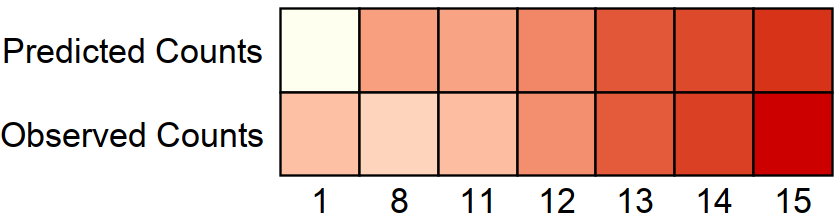

In [182]:
options(repr.plot.width = 7, repr.plot.height = 1.8)

cts_heatmap = ggplot(cts_df) +
geom_tile(aes(x=factor(x),y=y,fill=vals), col='black', size=0.5) +
scale_fill_gradient(low='ivory', high='red3')+
theme_void() +
theme(legend.position = "none",
     axis.text.y=element_text(size=20),
     axis.text.x=element_text(size=20))

cts_heatmap

### Importance Scores

In [193]:
imp_matrices = importance_to_matrix(CLUSTERS, importance, REGION)

In [264]:
importance[x, "lower_lim"]

[1] -0.05378968

In [273]:
imp_scores = list()

i=1
SLICE_BEGIN = 496
SLICE_END = 560
for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {
    
    imp_scores[[i]] = plot_seq(imp_matrices[[x]][,SLICE_BEGIN:SLICE_END], 
                   ymin=-0.01,
                   ymax=importance[x, "upper_lim"] ,
                   clip=T) 
#         annotate('text', x=SLICE_END-SLICE_BEGIN+10, y=importance[x, "upper_lim"]-0.02, 
#                  label="Imp", size=6)
    i = i+1
}

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



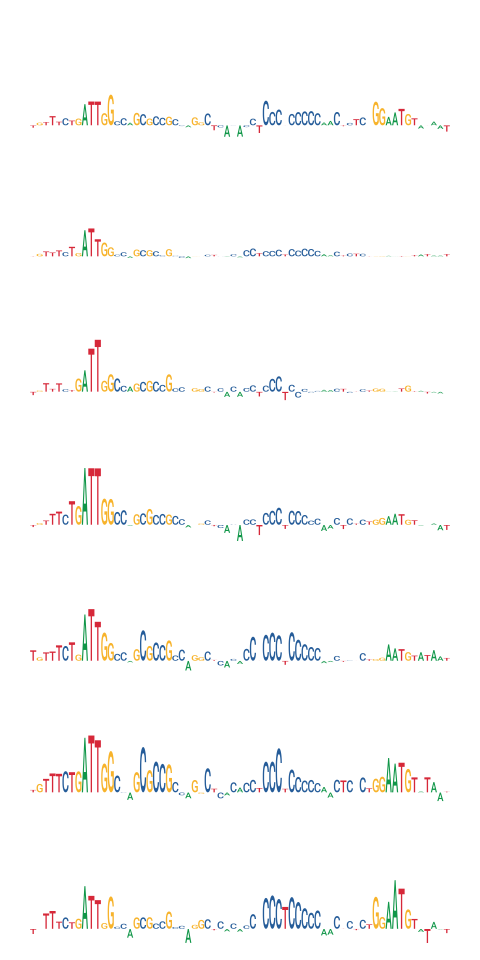

In [274]:
options(repr.plot.width = 4, repr.plot.height = 8)

imp_plots = wrap_plots(imp_scores, ncol=1)
imp_plots

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message:
"Removed 3 rows containing missing values (position_stack)."


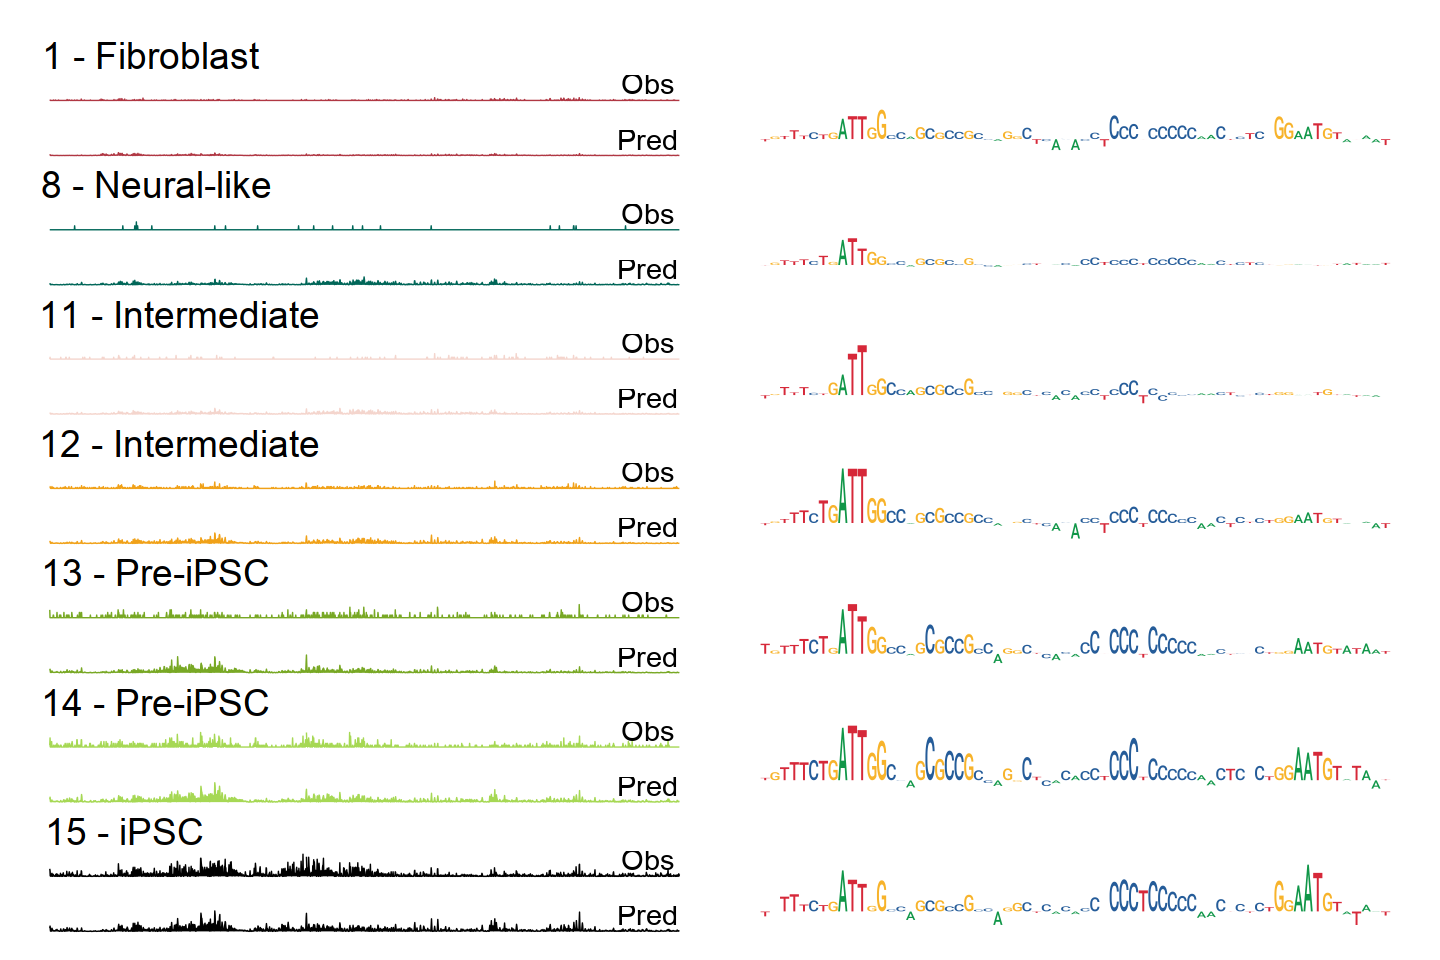

In [254]:
options(repr.plot.width = 12, repr.plot.height = 8)

wrap_plots(wrap_plots(plot_spacer(), signal_plot, plot_spacer(), heights=c(0,1,0)),
           wrap_plots(plot_spacer(), imp_plots, plot_spacer(), heights=c(0,1,0)),
           widths=c(6,6))

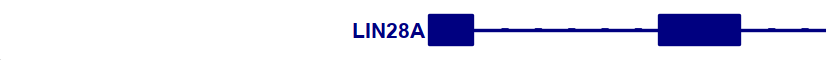

In [259]:
options(repr.plot.width = 7, repr.plot.height = 0.5)

gene_track = as.ggplot(~plotTracks(get_gene_track(CHR, gene_anno, show_axis = F),
#                                    background.panel="yellow", # use for alignment
                                   from=START, to=END
                      ))
gene_track

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message:
"Removed 3 rows containing missing values (position_stack)."


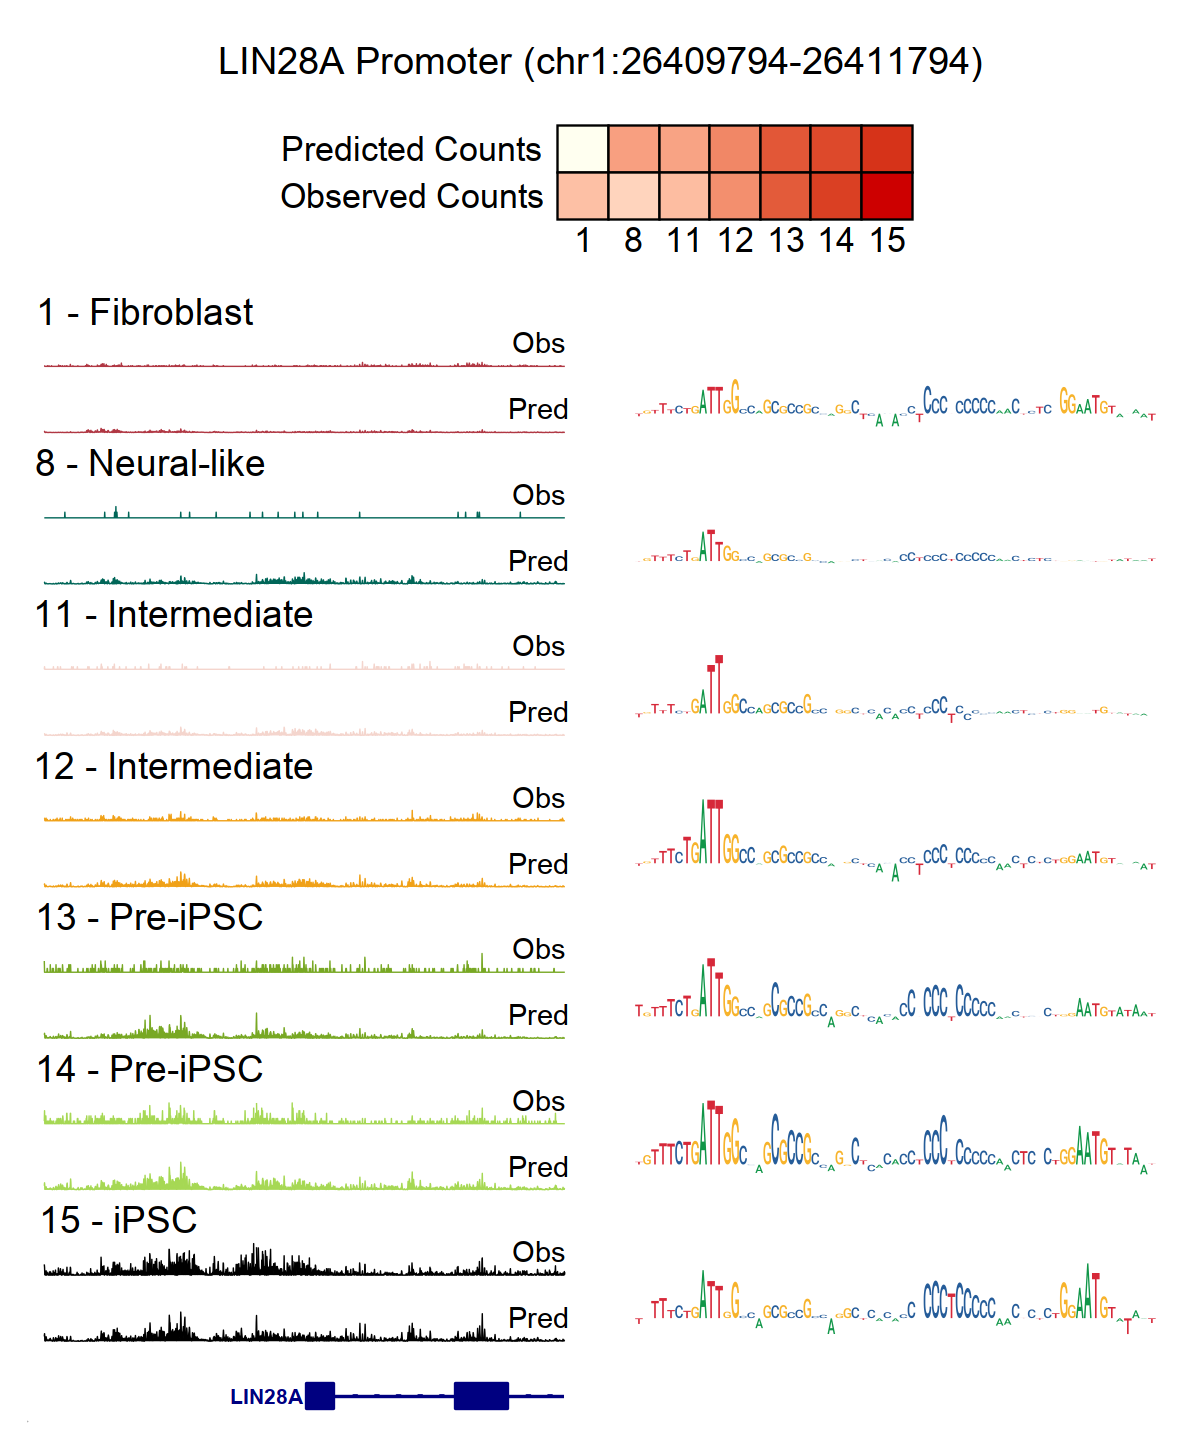

In [261]:
options(repr.plot.width = 10, repr.plot.height = 12)

combined = wrap_plots(top_plot,
           wrap_plots(plot_spacer(), cts_heatmap, plot_spacer(), widths=c(0.7,1,0.7)), 
          wrap_plots(
              wrap_plots(plot_spacer(), signal_plot, plot_spacer(), heights=c(0,1,0)),
              wrap_plots(plot_spacer(), imp_plots, plot_spacer(), heights=c(0,1,0)),
              widths=c(5,5)
              ),
           wrap_plots(plot_spacer(), gene_track, plot_spacer(), widths=c(0,1,1.1)),
          heights=c(1,1,10.5,0.5))

combined

In [262]:
ggsave("tmp.pdf", combined, height=12, width=10)

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message:
"Removed 3 rows containing missing values (position_stack)."


## ZEB Negative Importance Vignette

CDH1 predictions with importance scores.

In [278]:
model_preds = read.table("./vignette_intermediate/CDH1.prom.chr16.68737277.pred.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(model_preds) = model_preds$cluster_idx
model_preds$cluster_idx = NULL
model_preds

,predicted_adjusted_cts,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,6.664144,1.693763e-05,1.829209e-05,8.233899e-06,2.902217e-06,2.222906e-06,1.229909e-06,1.234740e-06,1.797027e-06,1.414673e-06,⋯,0.009181143,0.02050589,0.01245927,0.001844485,0.004608133,0.01159393,0.01573618,0.01123534,0.008262861,0.01569371
4,7.821249,4.708090e-05,2.977809e-05,1.056506e-05,5.875229e-06,4.000220e-06,3.213427e-06,2.816660e-06,3.966903e-06,4.216267e-06,⋯,0.047616508,0.09220504,0.05105598,0.019969055,0.019086579,0.05479518,0.06133809,0.03199484,0.027336456,0.07623486
8,7.130775,5.522939e-05,4.440740e-05,1.359815e-05,7.220344e-06,5.386577e-06,5.433253e-06,5.207190e-06,5.013708e-06,6.886337e-06,⋯,0.021105370,0.03585176,0.01823924,0.004318611,0.008331377,0.02078989,0.01800365,0.01408347,0.013822006,0.02238741
2,7.330437,6.255238e-05,3.248432e-05,7.034635e-06,4.166205e-06,2.729290e-06,4.188092e-06,4.384765e-06,4.767940e-06,5.382752e-06,⋯,0.018536313,0.03739542,0.01895624,0.003173755,0.005370177,0.01590620,0.02376752,0.01787795,0.014160520,0.03432296
7,7.839758,6.043080e-05,5.671847e-05,3.243763e-05,1.555032e-05,1.041976e-05,7.287078e-06,7.263317e-06,6.949510e-06,7.619562e-06,⋯,0.018865667,0.03573219,0.02008280,0.006639786,0.013058424,0.03344120,0.02835650,0.01589981,0.016542962,0.03243789
1,8.093779,1.166524e-04,9.488575e-05,5.276939e-05,2.133080e-05,1.391063e-05,1.019290e-05,1.392330e-05,2.017139e-05,2.270773e-05,⋯,0.078924400,0.12864035,0.05849506,0.015451772,0.040841166,0.10658377,0.12558614,0.07637806,0.059478644,0.11634231
16,8.034521,1.023378e-04,8.265259e-05,2.506871e-05,9.610769e-06,7.756709e-06,8.571529e-06,1.033156e-05,1.593154e-05,1.323361e-05,⋯,0.045682613,0.08647948,0.04926456,0.008194426,0.016749948,0.03945584,0.04638564,0.02866777,0.032577790,0.05288088


In [279]:
insertions = read.table("./vignette_intermediate/CDH1.prom.chr16.68737277.insertions.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(insertions) = insertions$cluster_idx
insertions$cluster_idx = NULL
insertions

,total_adjusted_cts,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,5.062595,0,0,0,0,0,0,0,0,0,⋯,0.01960784,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000
4,5.670347,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000
8,6.168166,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000
2,7.106877,0,0,0,0,0,0,0,0,0,⋯,0.03846154,0.03846154,0,0,0.00000000,0.00000000,0.03846154,0.00000000,0.00000000,0.0000000
7,8.073902,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.11111111,0.00000000,0.0000000
1,8.461882,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.07692308,0,0,0.07692308,0.00000000,0.00000000,0.00000000,0.07692308,0.1538462
16,8.550051,0,0,0,0,0,0,0,0,0,⋯,0.06382979,0.14893617,0,0,0.02127660,0.06382979,0.02127660,0.04255319,0.10638298,0.1063830


In [280]:
importance = read.table("./vignette_intermediate/CDH1.prom.chr16.68737277.counts.explain.tsv", 
                         sep='\t',
                        header=T)
rownames(importance) = importance$cluster_idx
importance$cluster_idx = NULL
importance

,lower_lim,upper_lim,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,-0.07947541,0.09080806,0.0014224955,0.0007410743,-0.0002063331,-2.930555e-04,9.432981e-05,0.0011390643,0.0013208927,0.0016536370,⋯,-8.695178e-05,-0.0008119897,0.0004828584,-0.0001012847,-0.0019872654,-0.0003326309,0.0003465541,-0.003793377,-0.0016362368,-0.0011168880
4,-0.07636631,0.06809741,0.0007006555,0.0018482398,0.0009704529,8.763044e-04,1.606991e-03,0.0017406537,0.0017404561,0.0008868272,⋯,-2.078171e-03,-0.0007908280,-0.0007128139,0.0009338948,-0.0008437223,-0.0003142403,-0.0004581952,-0.001076694,-0.0009833424,0.0001077706
8,-0.04654324,0.07285068,0.0025822188,0.0021086775,0.0019305331,2.116472e-03,1.851125e-03,0.0028340387,0.0020380403,0.0018147900,⋯,-3.242829e-04,-0.0010571006,-0.0001399784,0.0016129486,0.0006782863,0.0004841104,-0.0007580426,-0.001547340,-0.0010954732,0.0001252515
2,-0.04817490,0.06561382,0.0012717093,0.0017261278,0.0007208599,1.826651e-04,3.830681e-04,0.0012977310,0.0008312705,0.0006907091,⋯,1.095610e-03,0.0007951290,-0.0007310540,-0.0003555242,-0.0001070000,-0.0006467454,-0.0009218786,-0.004286713,-0.0015046149,-0.0002776708
7,-0.05308239,0.07287863,0.0018643163,0.0018794935,0.0009722120,1.016760e-03,9.729175e-04,0.0011088977,0.0007812737,0.0002991409,⋯,6.561400e-04,0.0021036192,-0.0002602385,0.0007167696,0.0019594492,-0.0011503634,-0.0012610737,-0.001562759,-0.0035977458,0.0004783330
1,-0.03758578,0.05922177,0.0012775201,0.0018880214,0.0015438191,2.704985e-04,7.984663e-04,0.0014542439,0.0011494251,0.0019013244,⋯,5.739331e-04,0.0010973892,-0.0011091818,-0.0001351709,-0.0001729188,-0.0018859605,-0.0037911586,-0.002915053,-0.0028852402,-0.0003156629
16,-0.05378968,0.06748849,0.0007138399,0.0013914790,0.0007045353,-8.628042e-05,1.530920e-03,0.0007498304,0.0007964980,0.0004187239,⋯,7.167974e-04,0.0024835101,-0.0004497767,0.0004427537,0.0007557348,-0.0015912667,-0.0023356219,-0.002668080,-0.0040697546,-0.0009413150


In [281]:
CLUSTERS = rownames(insertions)
CLUSTERS
all(CLUSTERS %in% rownames(model_preds))

[1] "5"  "4"  "8"  "2"  "7"  "1"  "16"

[1] TRUE

In [282]:
# center coordinate in file name +-1000
REGION = GRanges("chr16:68736277-68738277")

In [283]:
imp_matrices = importance_to_matrix(CLUSTERS, importance, REGION)

In [284]:
plot_mat_with_importance <- function(obs_mat, pred_mat, imp_mat, imp_scores, slice_min, slice_max,
                                     cluster_subset, linewidth=1, title=F) {
    plots = list()

    obs_mat = obs_mat[,slice_min:slice_max]
    pred_mat = pred_mat[,slice_min:slice_max]
    
    for (x in cluster_subset) {
        imp_mat[[x]] = imp_mat[[x]][,slice_min:slice_max]
    }
    
    i=1
    for (x in cluster_subset[order(cluster_config[cluster_subset,"new_cluster"])]) {
        plots[[i]] = ggplot(data.frame(x=seq(ncol(obs_mat)),
                                       y=unlist(obs_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=linewidth-0.5, col=cluster_config[x, "colour"]) +
                    ylim(0,1) + 
                    theme_void(base_size=18) +
                    annotate('text', x=slice_max-slice_min+10, y=0.5, label="Obs", size=6) +                    
                    theme(plot.title = element_text(hjust = 0.05)) +
                    annotate("segment", x=0, xend=slice_max-slice_min, 
                             y=0, yend=0, col='gray', size=0.3, alpha=0.3)
        
        plots[[i]] = plots[[i]] + 
                            ggtitle(paste(cluster_config[x, "new_cluster"],
                              cluster_config[x, "description"],
                             sep=" - ")) 
        
        plots[[i+1]] = ggplot(data.frame(x=seq(ncol(pred_mat)),
                                       y=unlist(pred_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=linewidth, col=cluster_config[x, "colour"]) +
                    ylim(0,1) + 
                    theme_void() +
                    annotate('text', x=slice_max-slice_min+10, y=0.5, label="Pred", size=6) +
                    theme(plot.title = element_text(hjust = 0.05)) +
                    annotate("segment", x=0, xend=slice_max-slice_min, 
                             y=0, yend=0, col='gray', size=0.3, alpha=0.3)
        
        plots[[i+1]] = plots[[i+1]] + 
                            ggtitle(" ") 
    
        # importance
        plots[[i+2]] = plot_seq(imp_mat[[x]], 
                               ymin=imp_scores[x, "lower_lim"],
                               ymax=imp_scores[x, "upper_lim"],
                               clip=T) +
                    annotate('text', x=slice_max-slice_min+10, y=imp_scores[x, "upper_lim"]-0.02, 
                             label="Imp", size=6)
        
        plots[[i+2]] = plots[[i+2]] + 
                            ggtitle(" ") 
        
        i = i + 3
    }
    
    plots
}


In [285]:
SLICE_BEGIN = 868
SLICE_END = 998

In [286]:
top_plot = ggplot() + annotate("text", x=5, y=1, label=sprintf("CDH1 Promoter (%s:%d-%d)", 
                                                              as.vector(seqnames(REGION)),
                                                              start(REGION)+SLICE_BEGIN,
                                                              start(REGION)+SLICE_END), size=8) +
#             annotate("text", x=7.5, y=1, label="Predicted", size=TXTSZ) +
            xlim(c(0,10)) + 
            theme_void()

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



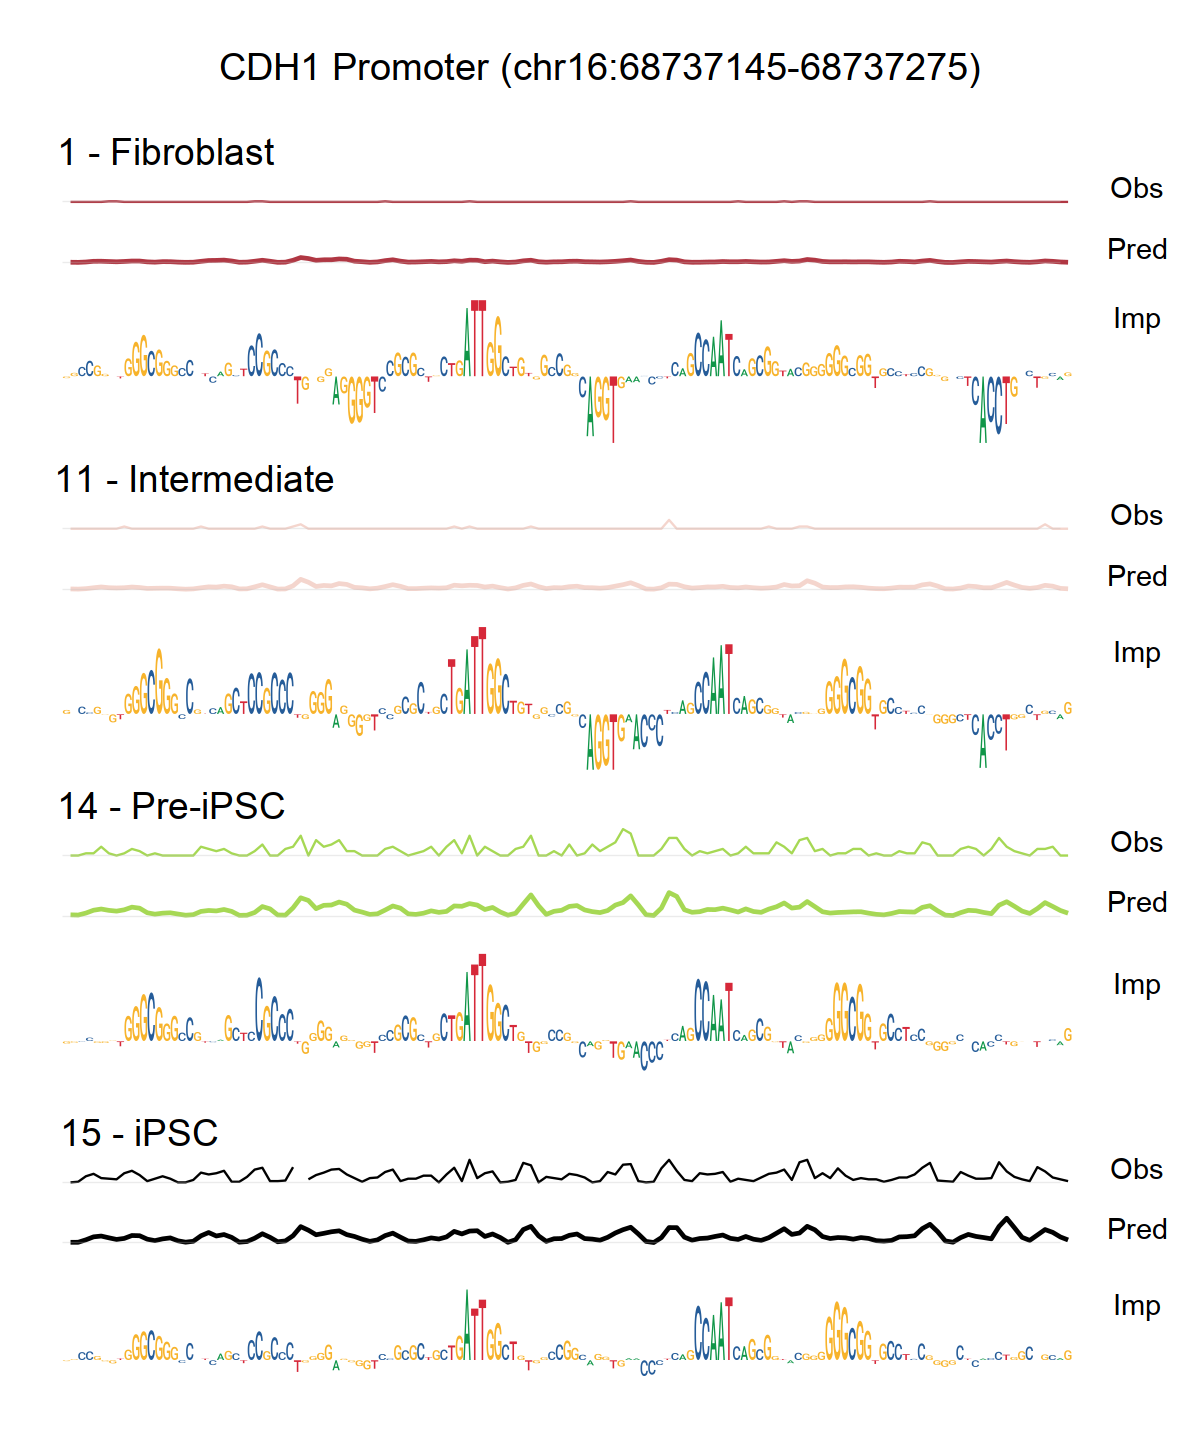

In [287]:
options(repr.plot.width = 10, repr.plot.height = 12)

CLUSTER_SUBSET = c("5","8","1","16")

wrap_plots(top_plot,
    wrap_plots(plot_mat_with_importance(insertions[,2:2001], model_preds[,2:2001], imp_matrices, 
                                        importance, SLICE_BEGIN, SLICE_END,
                                       cluster_subset=CLUSTER_SUBSET), 
               ncol=1,
              heights=rep(c(1,1,5), length(CLUSTER_SUBSET))),
           heights=c(1,11))

In [297]:
imp_scores = list()

i=1
for (x in CLUSTER_SUBSET[order(cluster_config[CLUSTER_SUBSET,"new_cluster"])]) {
    
    imp_scores[[i]] = plot_seq(imp_matrices[[x]][,SLICE_BEGIN:SLICE_END], 
                   ymin=importance[x, "lower_lim"],
                   ymax=importance[x, "upper_lim"] ,
                   clip=T) +
             ggtitle(paste(cluster_config[x, "new_cluster"],
                              cluster_config[x, "description"],
                             sep=" - "))  +
    theme(plot.title = element_text(size=18))
#         annotate('text', x=SLICE_END-SLICE_BEGIN+10, y=importance[x, "upper_lim"]-0.02, 
#                  label="Imp", size=6)
    i = i+1
}

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



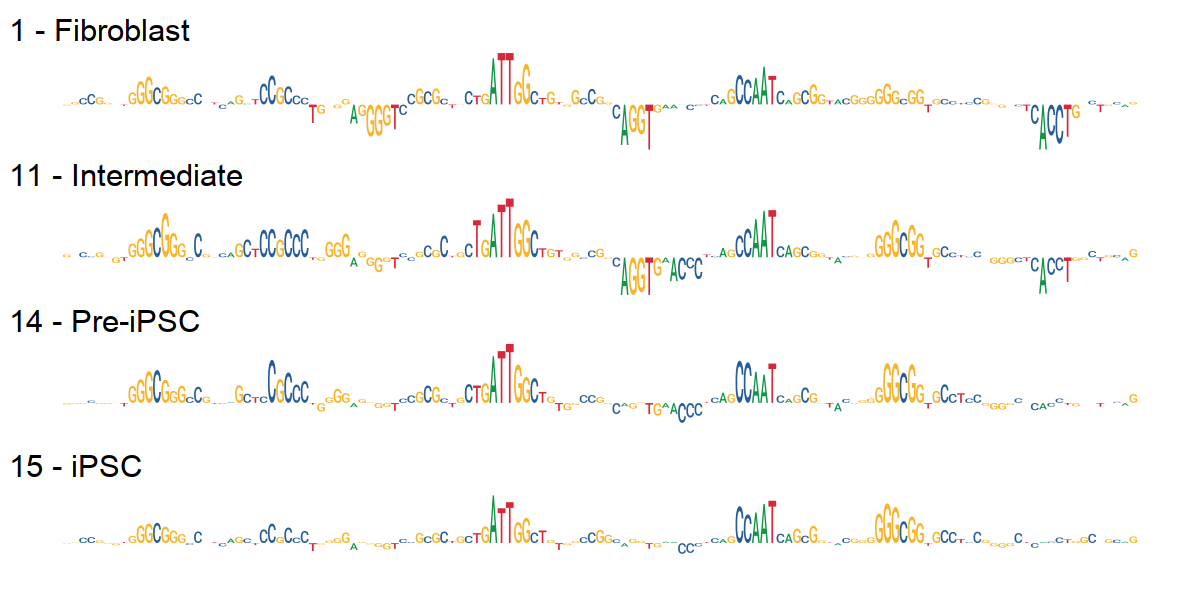

In [299]:
options(repr.plot.width = 10, repr.plot.height = 5)

imp_plots = wrap_plots(imp_scores, ncol=1)
imp_plots

### Perturbation LFCs

In [355]:
perturbation_lfcs$cluster_idx

[1]  5  4  8  2  7  1 16

In [367]:
perturbation_lfcs = read.table("./vignette_intermediate/CDH1.prom.chr16.68737277.perturb.lfc.tsv", 
                         sep='\t',
                        header=T)
#                         row.names="cluster_idx")

colnames(perturbation_lfcs)[2:5] = c("Mut 1", "Mut 2", "Mut 3", "Mut\nall")
rownames(perturbation_lfcs) = perturbation_lfcs$cluster_idx 
perturbation_lfcs

,cluster_idx,Mut 1,Mut 2,Mut 3,Mut all
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
5,5,0.11725295,0.59841020,0.77021470,1.244204400
4,4,0.10018609,0.14388207,0.28717387,0.419725720
8,8,0.22624111,0.55394304,0.44346622,0.827700200
2,2,0.16157220,0.17865421,0.22946270,0.467134450
7,7,0.22752754,0.05271887,0.11689454,0.231986020
1,1,0.02983830,0.05770844,0.09269314,0.085329530
16,16,-0.02165881,0.11932156,-0.07260832,-0.001121327


In [380]:
to_plot = perturbation_lfcs[CLUSTER_SUBSET,]
to_plot$cluster_idx = cluster_config[as.character(to_plot$cluster_idx), 
                                     "new_cluster"]
to_plot

,cluster_idx,Mut 1,Mut 2,Mut 3,Mut all
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,0.11725295,0.59841020,0.77021470,1.244204400
8,11,0.22624111,0.55394304,0.44346622,0.827700200
1,14,0.02983830,0.05770844,0.09269314,0.085329530
16,15,-0.02165881,0.11932156,-0.07260832,-0.001121327


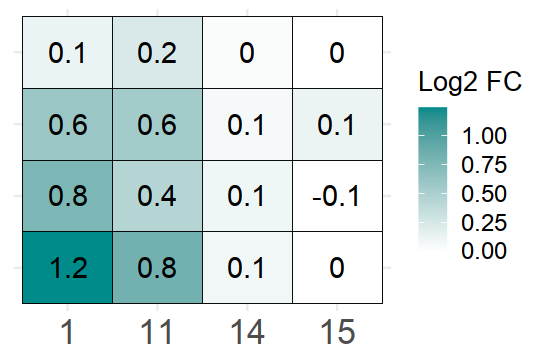

In [454]:
options(repr.plot.width = 4.5, repr.plot.height = 3)

ggplot(melt(to_plot[CLUSTER_SUBSET,], id.vars = "cluster_idx"),
      aes(y=factor(variable , levels=rev(levels(factor(variable)))),
              x=factor(cluster_idx))) +
geom_tile(aes(fill=value),
         col='black', size=0.2) +
geom_text(aes(label=round(value,1)), size=6) +
scale_fill_gradient(low='white', 
                    high='darkcyan', 
                    name="Log2 FC", 
                    limits=c(0,
                            max(to_plot[,2:ncol(to_plot)])),
                   oob=squish)+
theme_minimal() +
theme(axis.title.y=element_blank(),
      axis.title.x=element_blank(),
#     axis.text.y=element_text(size=20),
      legend.title = element_text(size=16),
      legend.text= element_text(size=14),
      axis.text.y=element_blank(),
     axis.text.x=element_text(size=20)) 

---

In [300]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] BSgenome.Hsapiens.UCSC.hg38_1.4.1 BSgenome_1.54.0                  
 [3] Biostrings_2.54.0                 XVector_0.26.0                   
 [5] ggseqlogo_0.1                     ggplotify_0.0.5                  
 [7] rtracklayer_1.46.0                Gviz_